In [1]:
%pylab inline
import calin.simulation.vs_optics;
import calin.io.sql_transceiver;
import calin.math.hex_array;

Populating the interactive namespace from numpy and matplotlib


In [2]:
rng = calin.math.rng.RNG()

In [104]:
mst = calin.ix.simulation.vs_optics.IsotropicDCArrayParameters()
mst.mutable_prescribed_array_layout().add_scope_positions();
mst.mutable_reflector_frame().set_optic_axis_rotation(-90);
dc = mst.mutable_reflector()
dc.set_curvature_radius(1920)
dc.set_aperture(1230)
dc.set_facet_num_hex_rings(5)
dc.mutable_psf_align().set_object_plane(inf);
dc.set_facet_spacing(122)
dc.set_facet_size(120)
dc.set_facet_focal_length(1607)
dc.set_facet_spot_size_probability(0.8)
dc.set_facet_labeling_parity(True)
dc.set_weathering_factor(1.0)
for id in [1,62,67,72,77,82,87]: dc.add_facet_missing_list(id-1)
mst.mutable_focal_plane().set_camera_diameter(235)
mst.mutable_focal_plane().mutable_translation().set_y(1600)
mst.mutable_pixel().set_spacing(5)
mst.mutable_pixel().set_cone_inner_diameter(5)
mst.mutable_pixel().set_cone_survival_prob(1)
mst.mutable_pixel().set_hex_module_size(1)
mst.mutable_pixel().set_module_num_hex_rings(9)
u1,v1 = calin.math.hex_array.cluster_hexid_to_center_uv(1,1)
x1,y1 = calin.math.hex_array.uv_to_xy(u1,v1)
rot = -arctan2(-y1,x1)/pi*180 + 30
mst.mutable_focal_plane().mutable_rotation().set_y(rot)

In [105]:
u1,v1,x1,y1

(2, 1, 2.5, 0.8660254037844386)

In [106]:
sql = calin.io.sql_transceiver.SQLite3Transceiver('../../../mybuild-work/mst.sqlite',
        calin.io.sql_transceiver.SQLite3Transceiver.TRUNCATE_RW)
sql.create_tables('array_parameters', mst.descriptor())
sql.insert('array_parameters', mst);
sql = None

In [107]:
print(mst.DebugString())

prescribed_array_layout {
  scope_positions {
  }
}
reflector_frame {
  optic_axis_rotation: -90
}
reflector {
  curvature_radius: 1920
  aperture: 1230
  psf_align {
    object_plane: inf
  }
  facet_num_hex_rings: 5
  facet_spacing: 122
  facet_size: 120
  facet_focal_length: 1607
  facet_spot_size_probability: 0.8
  facet_labeling_parity: true
  facet_missing_list: 0
  facet_missing_list: 61
  facet_missing_list: 66
  facet_missing_list: 71
  facet_missing_list: 76
  facet_missing_list: 81
  facet_missing_list: 86
  weathering_factor: 1
}
focal_plane {
  camera_diameter: 235
  translation {
    y: 1600
  }
  rotation {
    y: 49.106605350869096
  }
}
pixel {
  spacing: 5
  cone_inner_diameter: 5
  cone_survival_prob: 1
  hex_module_size: 1
  module_num_hex_rings: 9
}



In [108]:
array = calin.simulation.vs_optics.VSOArray()
array.generateFromArrayParameters(mst, rng)

In [109]:
scope = array.telescope(0)

[-650, 650, -650, 650]

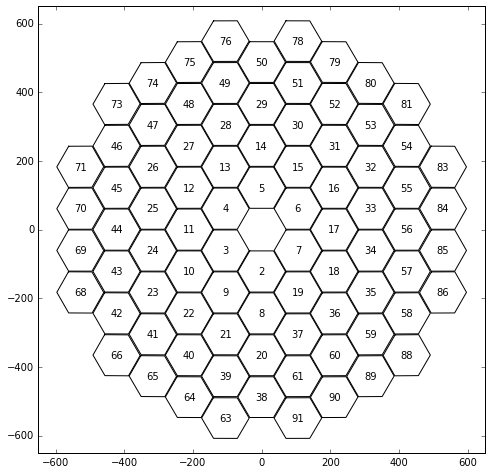

In [110]:
figure(figsize=(8,8))
for i in range(0,scope.numMirrors()):
    xc = scope.mirror(i).pos().x
    yc = scope.mirror(i).pos().z
    xe = []
    ye = []
    for j in [0,1,2,3,4,5,0]:
        v = scope.mirror(i).cornerInReflectorCoords(j,scope.facetSize())
        xe.append(v.x)
        ye.append(v.z)
    plot(xe,ye,'k')
    text(xc,yc,'%d'%(scope.mirror(i).hexID()+1),ha='center',va='center')
axis([-650,650,-650,650])

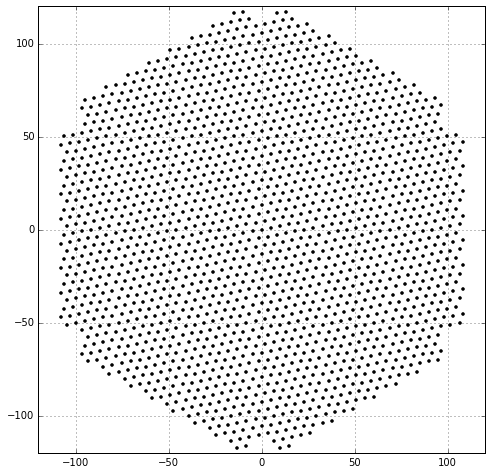

In [114]:
figure(figsize=(8,8))
for i in range(0,scope.numPixels()):
    v = calin.math.vs_physics.Vec3D(scope.pixel(i).pos())
#    scope.focalPlaneToReflector_mom(v)
    xc = v.x
    yc = v.z
    plot(xc,yc,'.k')
axis([-120, 120, -120, 120])
grid()
gcf().savefig('../../../mybuild-work/nectarcam.pdf')

In [48]:
scope.numPixels()

1855

In [70]:
v = calin.math.vs_physics.Vec3D(scope.pixel(1).pos())
print(v.x, v.y, v.z)
#scope.focalPlaneToReflector_mom(v)
#scope.reflectorToFocalPlane_mom(v)
print(v.x, v.y, v.z)

4.752399544708086 0.0 1.5539300394349715
4.752399544708086 0.0 1.5539300394349715
